In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter



# Load dataframes


In [2]:
# Load dataframes

# streaming_titles_info
streaming_titles_info = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\streaming_titles_info.csv")

# imdb_catalog_complete
imdb_catalog_complete = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\imdb_catalog_complete.csv")

# cancellation_rates
cancellation_rates = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\cancellation_rates.csv")

# streaming_costs
streaming_costs = pd.read_csv(r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\streaming_costs.csv")

# Comparison df
comparison_data = pd.read_csv(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv')


Make seperate df for each platform

In [3]:
# Filter rows for each platform where the platform column is 1 (indicating availability on the platform)
amazon_df = streaming_titles_info[streaming_titles_info['Amazon'] == 1].copy()
hulu_df = streaming_titles_info[streaming_titles_info['Hulu'] == 1].copy()
netflix_df = streaming_titles_info[streaming_titles_info['Netflix'] == 1].copy()
apple_df = streaming_titles_info[streaming_titles_info['Apple'] == 1].copy()
hbo_df = streaming_titles_info[streaming_titles_info['HBO'] == 1].copy()


In [4]:
# Dictionary to store the platform DataFrames
platforms_df = {
    'Amazon': amazon_df,
    'Apple': apple_df,
    'HBO': hbo_df,
    'Hulu': hulu_df,
    'Netflix': netflix_df,
    'HBO': hbo_df,
}

In [5]:
streaming_titles_info.head()


,imdbId,title,releaseYear,type,averageRating,numVotes,Amazon,Hulu,Netflix,HBO,...,Music,Mystery,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,tt0000417,A Trip to the Moon,1902,movie,8.1,57373,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0000499,An Impossible Voyage,1904,movie,7.5,4153,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,tt0002646,Atlantis,1913,movie,6.5,502,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0003014,Ingeborg Holm,1913,movie,7.0,1479,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0004181,Judith of Bethulia,1914,movie,6.2,1482,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
streaming_titles_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89004 entries, 0 to 89003
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdbId              89004 non-null  object 
 1   title               89004 non-null  object 
 2   releaseYear         89004 non-null  int64  
 3   type                89004 non-null  object 
 4   averageRating       89004 non-null  float64
 5   numVotes            89004 non-null  int64  
 6   Amazon              89004 non-null  int64  
 7   Hulu                89004 non-null  int64  
 8   Netflix             89004 non-null  int64  
 9   HBO                 89004 non-null  int64  
 10  Apple               89004 non-null  int64  
 11  Action & Adventure  89004 non-null  int64  
 12  Animation           89004 non-null  int64  
 13  Comedy              89004 non-null  int64  
 14  Crime               89004 non-null  int64  
 15  Documentary         89004 non-null  int64  
 16  Dram

In [7]:
imdb_catalog_complete.head()


,imdbId,genres,averageRating,numVotes
0,tt0000001,"Documentary,Short",5.7,2106
1,tt0000002,"Animation,Short",5.6,283
2,tt0000003,"Animation,Comedy,Romance",6.5,2128
3,tt0000004,"Animation,Short",5.4,182
4,tt0000005,"Comedy,Short",6.2,2859


In [8]:
cancellation_rates.head()


,Platform,Cancellation_Rate_Percentage
0,Max,26.9
1,Broadcast,26.6
2,Disney,21.1
3,Paramount+,16.9
4,Hulu,15.2


In [9]:
streaming_costs.head()


,Platform,Price_Per_Month
0,Netflix,15.49
1,Hulu,17.99
2,Amazon Prime,14.97
3,Apple TV,9.99
4,Max,16.99


# Analyze Content Availability

Done: Calculate the total number of titles available in the U.S. for each platform.

## Create a breakdown of content types (movies vs. TV series). (Not considering ratings)

In [10]:
# Function to calculate content type breakdown and print in percentage
def calculate_and_print_content_type_percentage(platform_df, platform_name):
    # Count the number of movies and TV series
    content_type_counts = platform_df['type'].value_counts()
    
    # Calculate the percentage of movies and TV series
    total_count = content_type_counts.sum()
    content_type_percentage = (content_type_counts / total_count) * 100
    
    # Print results in percentage form
    print(f"\n{platform_name} Breakdown:")
    for content_type, percentage in content_type_percentage.items():
        print(f"{content_type}: {percentage:.2f}%")
    
    return content_type_percentage

# Loop through platforms_df and calculate content type percentages for each platform
for platform_name, platform_df in platforms_df.items():
    calculate_and_print_content_type_percentage(platform_df, platform_name)


Amazon Breakdown:
movie: 88.66%
tv: 11.34%

Apple Breakdown:
movie: 78.94%
tv: 21.06%

HBO Breakdown:
movie: 73.33%
tv: 26.67%

Hulu Breakdown:
movie: 63.15%
tv: 36.85%

Netflix Breakdown:
movie: 78.04%
tv: 21.96%



Amazon Breakdown:
movie: 88.66%
tv: 11.34%

Apple Breakdown:
movie: 78.94%
tv: 21.06%

HBO Breakdown:
movie: 73.33%
tv: 26.67%

Hulu Breakdown:
movie: 63.15%
tv: 36.85%

Netflix Breakdown:
movie: 78.04%
tv: 21.96%
Saved visualization as PNG.


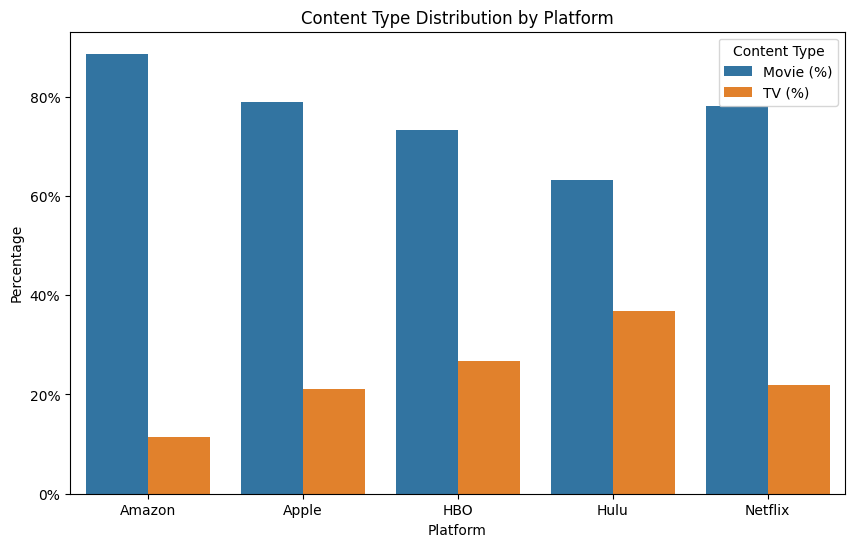

In [11]:
# Initialize empty lists to store the platform names and percentages
platform_names = []
movie_percentages = []
tv_percentages = []

# Loop through each platform in the platforms_df dictionary and calculate the percentages
for platform_name, platform_df in platforms_df.items():
    content_type_percentage = calculate_and_print_content_type_percentage(platform_df, platform_name)
    
    # Append results to the lists
    platform_names.append(platform_name)
    movie_percentages.append(content_type_percentage.get('movie', 0))
    tv_percentages.append(content_type_percentage.get('tv', 0))

# Combine all results into a DataFrame for visualization
content_type_comparison = pd.DataFrame({
    'Platform': platform_names,
    'Movie (%)': movie_percentages,
    'TV (%)': tv_percentages
})

# Melt the DataFrame for visualization
content_type_comparison_melted = content_type_comparison.melt(id_vars='Platform', var_name='Content Type', value_name='Percentage')

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Percentage', hue='Content Type', data=content_type_comparison_melted)
plt.title('Content Type Distribution by Platform')
plt.ylabel('Percentage')
plt.xlabel('Platform')
plt.legend(title='Content Type', loc='upper right')

# Format the y-axis to show percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter())

# Save the plot as a PNG file after displaying it
plt.savefig(r"C:\Users\kimbe\Documents\StreamingAnalysis\outputs\Analyze Content Availability\type_distribution_platform.png", dpi=300)
print("Saved visualization as PNG.")

# Display the plot
plt.show()


## Create a breakdown of content types (movies vs. TV series) 7.5 or higher rating

In [12]:
# Function to calculate content type breakdown (movie vs tv) for content with averageRating >= 7.5
def calculate_and_print_content_type_percentage_high_rating(platform_df, platform_name):
    # Filter the DataFrame for content with rating >= 7.5
    high_rating_df = platform_df[platform_df['averageRating'] >= 7.5]
    
    # Count the number of movies and TV series
    content_type_counts = high_rating_df['type'].value_counts()
    
    # Calculate the percentage of movies and TV series
    total_count = content_type_counts.sum()
    content_type_percentage = (content_type_counts / total_count) * 100
    
    # Print results in percentage form
    print(f"{platform_name} Breakdown for ratings 7.5 or higher:")
    for content_type, percentage in content_type_percentage.items():
        print(f"{content_type}: {percentage:.2f}%")
    
    return content_type_percentage


In [13]:
# Initialize empty lists to store the platform names and percentages for high rating content
platform_names_high_rating = []
movie_percentages_high_rating = []
tv_percentages_high_rating = []

# Loop through each platform in the platforms_df dictionary and calculate the high rating percentages
for platform_name, platform_df in platforms_df.items():
    content_type_percentage_high_rating = calculate_and_print_content_type_percentage_high_rating(platform_df, platform_name)
    
    # Append results to the lists
    platform_names_high_rating.append(platform_name)
    movie_percentages_high_rating.append(content_type_percentage_high_rating.get('movie', 0))
    tv_percentages_high_rating.append(content_type_percentage_high_rating.get('tv', 0))

# Combine all results for high rating content into a DataFrame for visualization
content_type_comparison_high_rating = pd.DataFrame({
    'Platform': platform_names_high_rating,
    'Movie (%)': movie_percentages_high_rating,
    'TV (%)': tv_percentages_high_rating
})

Amazon Breakdown for ratings 7.5 or higher:
movie: 65.14%
tv: 34.86%
Apple Breakdown for ratings 7.5 or higher:
movie: 50.00%
tv: 50.00%
HBO Breakdown for ratings 7.5 or higher:
movie: 54.42%
tv: 45.58%
Hulu Breakdown for ratings 7.5 or higher:
tv: 65.16%
movie: 34.84%
Netflix Breakdown for ratings 7.5 or higher:
tv: 51.34%
movie: 48.66%


Saved visualization as PNG.


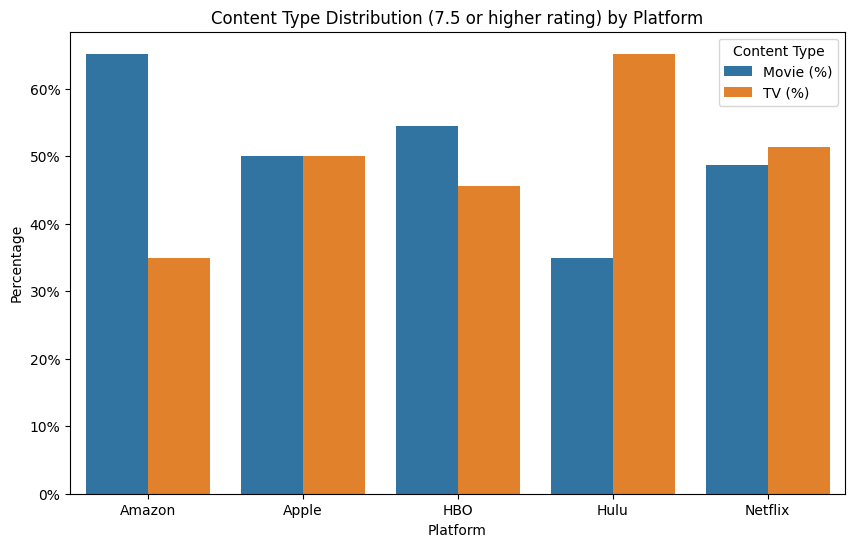

In [14]:
# Melt the DataFrame for visualization
content_type_comparison_high_rating_melted = content_type_comparison_high_rating.melt(id_vars='Platform', var_name='Content Type', value_name='Percentage')

# Plot the comparison for content with ratings 7.5 or higher
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Percentage', hue='Content Type', data=content_type_comparison_high_rating_melted)
plt.title('Content Type Distribution (7.5 or higher rating) by Platform')
plt.ylabel('Percentage')
plt.xlabel('Platform')
plt.legend(title='Content Type', loc='upper right')
# Format the y-axis to show percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter())

# Save the plot as a PNG file
plt.savefig(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\Analyze Content Availability\type_distribution_platform_highRating.png', dpi=300)
print("Saved visualization as PNG.")


plt.show()



Add to comparison df

In [15]:
# Add a prefix to differentiate the high-rating content comparison columns
content_type_comparison_high_rating.rename(columns={
    'Movie (%)': 'High Rating Movie (%)',
    'TV (%)': 'High Rating TV (%)'
}, inplace=True)

# Load the existing comparison DataFrame
try:
    comparison_df = pd.read_csv(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv')
except FileNotFoundError:
    comparison_df = pd.DataFrame()

# Remove any columns that start with 'Unnamed' to clean up the DataFrame
comparison_df = comparison_df.loc[:, ~comparison_df.columns.str.contains('^Unnamed')]

# Merge the high-rating percentages into the comparison DataFrame
comparison_df = pd.merge(
    comparison_df,
    content_type_comparison_high_rating,
    how='outer',  # Ensure all platforms are included
    on='Platform'
)

# Drop duplicate columns if they exist after the merge
comparison_df.drop(columns=[col for col in comparison_df.columns if col.endswith('_y')], inplace=True)

# Rename the columns if necessary to avoid ambiguity
comparison_df.rename(columns={
    'High Rating Movie (%)_x': 'High Rating Movie (%)',
    'High Rating TV (%)_x': 'High Rating TV (%)'
}, inplace=True)

# Format the columns as percentages (x.xx%)
comparison_df['High Rating Movie (%)'] = comparison_df['High Rating Movie (%)'].apply(lambda x: f'{x:.2f}%')
comparison_df['High Rating TV (%)'] = comparison_df['High Rating TV (%)'].apply(lambda x: f'{x:.2f}%')

# Check if the new columns are successfully added and formatted
print("Updated Comparison DataFrame columns:", comparison_df.columns)

# Save the updated comparison DataFrame
comparison_path = r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv'
comparison_df.to_csv(comparison_path, index=False)
print(f"Updated Comparison DataFrame with high-rating content saved at: {comparison_path}")


Updated Comparison DataFrame columns: Index(['Platform', 'Number of US Titles', 'US Percentage',
       'High Rating Movie (%)', 'High Rating TV (%)'],
      dtype='object')
Updated Comparison DataFrame with high-rating content saved at: C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv


## Access to the top 25% most popular titles in IMDb catalog

Determine what imdbId have the 25% highest numVotes and the 25% highest ratings in imdb_catalog_complete

In [16]:
# Sort by numVotes and get the top 25%
numVotes_sorted = imdb_catalog_complete.sort_values(by='numVotes', ascending=False)
top_25_percent_numVotes = numVotes_sorted.head(int(len(numVotes_sorted) * 0.25))

# Sort by imdbAverageRating and get the top 25%
rating_sorted = imdb_catalog_complete.sort_values(by='averageRating', ascending=False)
top_25_percent_ratings = rating_sorted.head(int(len(rating_sorted) * 0.25))

# Extract the imdbId for the top 25% based on numVotes and imdbAverageRating
top_25_numVotes_imdbIds = top_25_percent_numVotes['imdbId']
top_25_ratings_imdbIds = top_25_percent_ratings['imdbId']

In [17]:
# Total number of titles in top 25% by numVotes
total_top_25_numVotes = len(top_25_percent_numVotes)

# Total number of titles in top 25% by averageRating
total_top_25_ratings = len(top_25_percent_ratings)

print(f"Total top 25% by numVotes: {total_top_25_numVotes}")
print(f"Total top 25% by averageRating: {total_top_25_ratings}")


Total top 25% by numVotes: 376687
Total top 25% by averageRating: 376687


 ### Access to Top 25% Titles Based on numVotes

Amazon has 12.05% of the top 25% most popular titles based on numVotes.
Apple has 3.59% of the top 25% most popular titles based on numVotes.
HBO has 1.60% of the top 25% most popular titles based on numVotes.
Hulu has 1.84% of the top 25% most popular titles based on numVotes.
Netflix has 4.45% of the top 25% most popular titles based on numVotes.
Saved numVotes access visualization as PNG.


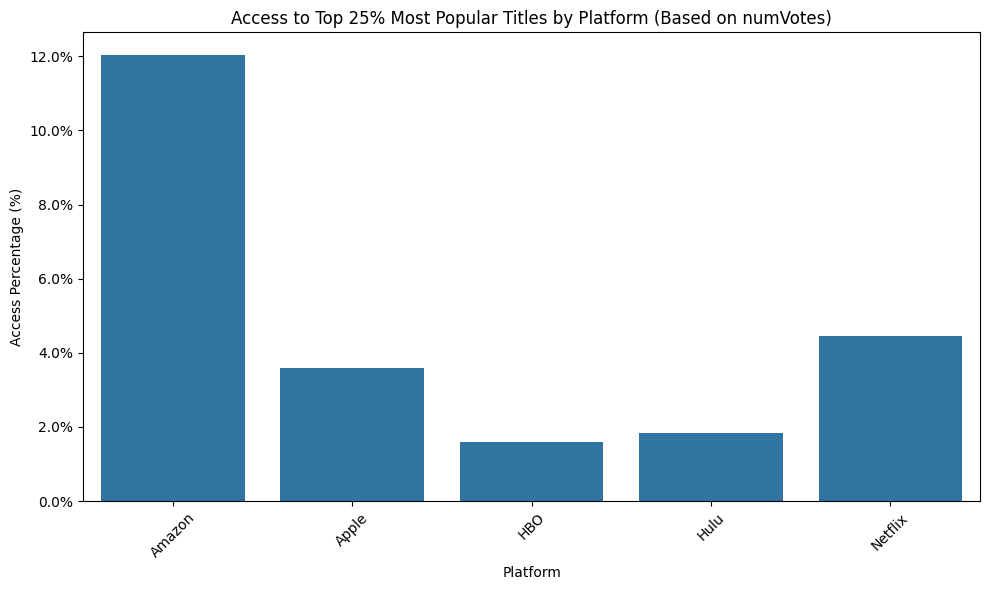

In [18]:
# Function to calculate the percentage of top 25% titles based on numVotes available on each platform
def calculate_platform_access_to_top_25_numVotes(platform_df, top_25_numVotes_imdbIds, platform_name):
    # Check how many titles in the platform DataFrame match the top 25% imdbIds (numVotes)
    matched_titles = platform_df[platform_df['imdbId'].isin(top_25_numVotes_imdbIds)]
    
    # Calculate the percentage of top 25% titles available on the platform
    total_top_25 = len(top_25_numVotes_imdbIds)
    matched_titles_count = len(matched_titles)
    percentage_access = (matched_titles_count / total_top_25) * 100
    
    # Print the results
    print(f"{platform_name} has {percentage_access:.2f}% of the top 25% most popular titles based on numVotes.")
    
    return percentage_access

# Dictionary to store the access percentages for numVotes
platform_access_percentages_numVotes = {}

# Loop through each platform and calculate access to the top 25% titles based on numVotes
for platform_name, platform_df in platforms_df.items():
    access_percentage_numVotes = calculate_platform_access_to_top_25_numVotes(platform_df, top_25_numVotes_imdbIds, platform_name)
    platform_access_percentages_numVotes[f'{platform_name}_numVotes'] = access_percentage_numVotes

# Prepare the data for visualization (numVotes access)
access_data_numVotes = {
    'Platform': [],
    'Access to Top 25% (numVotes) (%)': []
}

# Loop through the platforms and populate the access_data dictionary for numVotes
for platform_name in platforms_df.keys():
    access_data_numVotes['Platform'].append(platform_name)
    access_data_numVotes['Access to Top 25% (numVotes) (%)'].append(platform_access_percentages_numVotes[f'{platform_name}_numVotes'])

# Create DataFrame from the access_data dictionary
access_df_numVotes = pd.DataFrame(access_data_numVotes)

# Plot the comparison for numVotes access
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Access to Top 25% (numVotes) (%)', data=access_df_numVotes)
plt.title('Access to Top 25% Most Popular Titles by Platform (Based on numVotes)')
plt.ylabel('Access Percentage (%)')
plt.xlabel('Platform')
plt.xticks(rotation=45)

# Format the y-axis to show percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter())

plt.tight_layout()


# Save the plot for numVotes access
plt.savefig(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\Analyze Content Availability\access_to_top_25_percent_numVotes.png', dpi=300)
print("Saved numVotes access visualization as PNG.")

plt.show()

Add to comparison df

In [19]:
# Rename the column in access_df_numVotes for clarity
access_df_numVotes.rename(columns={
    'Access to Top 25% (numVotes) (%)': 'Access to Top 25% Titles (numVotes) (%)'
}, inplace=True)

# Merge the access_df_numVotes into the comparison DataFrame
try:
    # Load the existing comparison DataFrame
    comparison_df = pd.read_csv(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv')
except FileNotFoundError:
    # Create an empty comparison DataFrame if the file doesn't exist
    comparison_df = pd.DataFrame()

# Merge the data for numVotes access
comparison_df = pd.merge(
    comparison_df,
    access_df_numVotes,
    how='outer',  # Ensure all platforms are included
    on='Platform'
)

# Check the column names in the merged DataFrame
print(comparison_df.columns)

# Format the percentage column by multiplying by 100 and adding the % sign
if 'Access to Top 25% Titles (numVotes) (%)' in comparison_df.columns:
    comparison_df['Access to Top 25% Titles (numVotes) (%)'] = comparison_df['Access to Top 25% Titles (numVotes) (%)'].apply(lambda x: f'{x:.2f}%')

# Save the updated comparison DataFrame
comparison_path = r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv'
comparison_df.to_csv(comparison_path, index=False)
print(f"Updated Comparison DataFrame with numVotes access saved at: {comparison_path}")



Index(['Platform', 'Number of US Titles', 'US Percentage',
       'High Rating Movie (%)', 'High Rating TV (%)',
       'Access to Top 25% Titles (numVotes) (%)'],
      dtype='object')
Updated Comparison DataFrame with numVotes access saved at: C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv


### Access to Top 25% Titles Based on averageRating

Amazon has 0.94% of the top 25% most popular titles based on averageRating.
Apple has 0.36% of the top 25% most popular titles based on averageRating.
HBO has 0.19% of the top 25% most popular titles based on averageRating.
Hulu has 0.20% of the top 25% most popular titles based on averageRating.
Netflix has 0.35% of the top 25% most popular titles based on averageRating.
Saved averageRating access visualization as PNG.


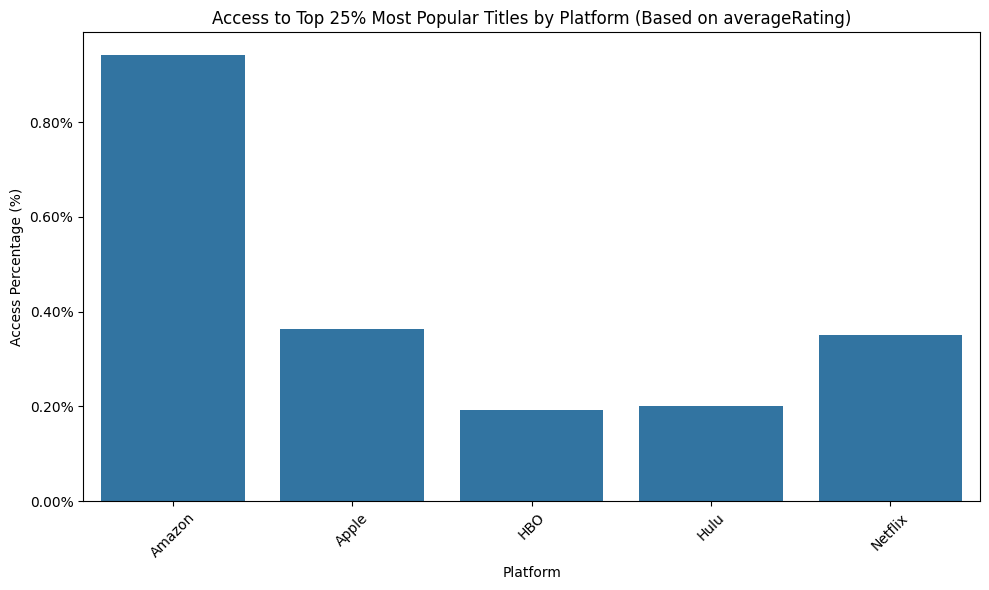

In [20]:
# Function to calculate the percentage of top 25% titles based on averageRating available on each platform
def calculate_platform_access_to_top_25_ratings(platform_df, top_25_ratings_imdbIds, platform_name):
    # Check how many titles in the platform DataFrame match the top 25% imdbIds (averageRating)
    matched_titles = platform_df[platform_df['imdbId'].isin(top_25_ratings_imdbIds)]
    
    # Calculate the percentage of top 25% titles available on the platform
    total_top_25 = len(top_25_ratings_imdbIds)
    matched_titles_count = len(matched_titles)
    percentage_access = (matched_titles_count / total_top_25) * 100
    
    # Print the results
    print(f"{platform_name} has {percentage_access:.2f}% of the top 25% most popular titles based on averageRating.")
    
    return percentage_access

# Dictionary to store the access percentages for averageRating
platform_access_percentages_ratings = {}

# Loop through each platform and calculate access to the top 25% titles based on averageRating
for platform_name, platform_df in platforms_df.items():
    access_percentage_ratings = calculate_platform_access_to_top_25_ratings(platform_df, top_25_ratings_imdbIds, platform_name)
    platform_access_percentages_ratings[f'{platform_name}_ratings'] = access_percentage_ratings

# Prepare the data for visualization (averageRating access)
access_data_averageRating = {
    'Platform': [],
    'Access to Top 25% (averageRating) (%)': []
}

# Loop through the platforms and populate the access_data dictionary for averageRating
for platform_name in platforms_df.keys():
    access_data_averageRating['Platform'].append(platform_name)
    access_data_averageRating['Access to Top 25% (averageRating) (%)'].append(platform_access_percentages_ratings[f'{platform_name}_ratings'])

# Create DataFrame from the access_data dictionary
access_df_averageRating = pd.DataFrame(access_data_averageRating)

# Plot the comparison for averageRating access
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Access to Top 25% (averageRating) (%)', data=access_df_averageRating)
plt.title('Access to Top 25% Most Popular Titles by Platform (Based on averageRating)')
plt.ylabel('Access Percentage (%)')
plt.xlabel('Platform')
plt.xticks(rotation=45)

# Format the y-axis to show percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter())

plt.tight_layout()

# Save the plot for averageRating access
plt.savefig(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\Analyze Content Availability\access_to_top_25_percent_averageRating.png', dpi=300)
print("Saved averageRating access visualization as PNG.")

plt.show()


Add to comparison df

In [21]:
# Append the averageRating access results to the comparison DataFrame
access_df_averageRating['Access to Top 25% (averageRating) (%)'] = access_df_averageRating[
    'Access to Top 25% (averageRating) (%)'
].apply(lambda x: f"{x:.2f}%" if not pd.isna(x) else "")

# Merge the new results with the comparison DataFrame
comparison_df = pd.merge(
    comparison_df,
    access_df_averageRating,
    on='Platform',
    how='outer'
)

# Save the updated comparison DataFrame
comparison_path = r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv'
comparison_df.to_csv(comparison_path, index=False)
print(f"Updated Comparison DataFrame saved at: {comparison_path}")

Updated Comparison DataFrame saved at: C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv


# Assess Content Quality

## Calculate the Average IMDb Rating for Each Platform

Updated Comparison DataFrame with average IMDb ratings saved at: C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv


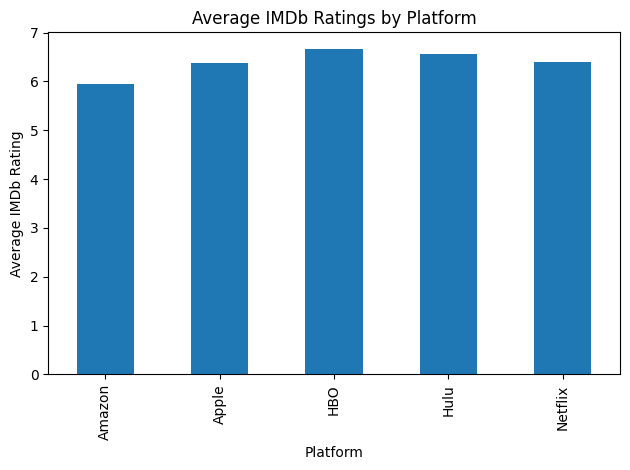

In [22]:
# Dictionary to store average ratings
avg_ratings = {}

# Loop through each platform in the dictionary
for platform, df in platforms_df.items():
    avg_rating = df['averageRating'].mean()
    avg_ratings[platform] = avg_rating

# Convert the avg_ratings dictionary to a DataFrame for easier merging
avg_ratings_df = pd.DataFrame(list(avg_ratings.items()), columns=['Platform', 'Average IMDb Rating'])

# Format the 'Average IMDb Rating' column to 2 decimal places
avg_ratings_df['Average IMDb Rating'] = avg_ratings_df['Average IMDb Rating'].apply(lambda x: round(x, 2))

# Merge the avg_ratings_df into the comparison DataFrame
try:
    # Load the existing comparison DataFrame
    comparison_df = pd.read_csv(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv')
except FileNotFoundError:
    # Create an empty comparison DataFrame if the file doesn't exist
    comparison_df = pd.DataFrame()

# Merge the data for average IMDb rating
comparison_df = pd.merge(
    comparison_df,
    avg_ratings_df,
    how='outer',  # Ensure all platforms are included
    on='Platform'
)

# Save the updated comparison DataFrame
comparison_path = r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv'
comparison_df.to_csv(comparison_path, index=False)
print(f"Updated Comparison DataFrame with average IMDb ratings saved at: {comparison_path}")

# Plot the average IMDb ratings for each platform
avg_ratings_df.plot(kind='bar', x='Platform', y='Average IMDb Rating', title='Average IMDb Ratings by Platform', legend=False)
plt.ylabel('Average IMDb Rating')
plt.xlabel('Platform')
plt.tight_layout()

# Save the plot as a PNG image
plt.savefig(r"C:\Users\kimbe\Documents\StreamingAnalysis\outputs\Assess Content Quality\avg_ratings_comparison.png")
plt.show()



## Percentages of titles in each quality category for each platform 
(top-rated, average-rated, bottom-rated)

In [23]:
# Calculate the 25th and 75th percentiles for IMDb ratings
bottom_25_threshold = imdb_catalog_complete['averageRating'].quantile(0.25)
top_25_threshold = imdb_catalog_complete['averageRating'].quantile(0.75)

# Print the thresholds for reference
print(f"Bottom 25% threshold (IMDb Rating): {bottom_25_threshold}")
print(f"Top 25% threshold (IMDb Rating): {top_25_threshold}")

Bottom 25% threshold (IMDb Rating): 6.2
Top 25% threshold (IMDb Rating): 7.9


In [24]:
# Define function to categorize titles based on IMDb rating thresholds
def categorize_titles_by_rating(df, top_25_threshold, bottom_25_threshold):
    top_rated = df[df['averageRating'] >= top_25_threshold]
    bottom_rated = df[df['averageRating'] <= bottom_25_threshold]
    average_rated = df[(df['averageRating'] > bottom_25_threshold) & (df['averageRating'] < top_25_threshold)]
    
    return top_rated, average_rated, bottom_rated

# Create a dictionary to store the classification percentages for each platform
platform_quality_percentages = {}

# Loop through each platform to classify titles and calculate percentages
for platform_name, platform_df in platforms_df.items():
    top_rated, average_rated, bottom_rated = categorize_titles_by_rating(
        platform_df, top_25_threshold, bottom_25_threshold
    )
    
    total_titles = len(platform_df)
    top_rated_percent = (len(top_rated) / total_titles) * 100
    average_rated_percent = (len(average_rated) / total_titles) * 100
    bottom_rated_percent = (len(bottom_rated) / total_titles) * 100
    
    platform_quality_percentages[platform_name] = {
        'Top Rated (%)': top_rated_percent,
        'Average Rated (%)': average_rated_percent,
        'Bottom Rated (%)': bottom_rated_percent
    }

# Convert dictionary to DataFrame
quality_data = pd.DataFrame(platform_quality_percentages).T

# Merge the new quality data into the comparison DataFrame
try:
    comparison_df = pd.read_csv(r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv')
except FileNotFoundError:
    comparison_df = pd.DataFrame()

comparison_df = pd.merge(
    comparison_df,
    quality_data,
    how='outer',  # Ensure all platforms are included
    left_on='Platform',
    right_index=True
)

# Format percentages as x.xx%
comparison_df['Top Rated (%)'] = comparison_df['Top Rated (%)'].apply(lambda x: f'{x:.2f}%')
comparison_df['Average Rated (%)'] = comparison_df['Average Rated (%)'].apply(lambda x: f'{x:.2f}%')
comparison_df['Bottom Rated (%)'] = comparison_df['Bottom Rated (%)'].apply(lambda x: f'{x:.2f}%')

# Save the updated comparison DataFrame
comparison_path = r'C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv'
comparison_df.to_csv(comparison_path, index=False)
print(f"Updated Comparison DataFrame with rating categories saved at: {comparison_path}")

Updated Comparison DataFrame with rating categories saved at: C:\Users\kimbe\Documents\StreamingAnalysis\outputs\comparison_data.csv
